In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Using TensorFlow backend
TensorFlow version: 2.10.1
KerasNLP version: 0.7.0


In [3]:
# This sample uses Keras Core, the multi-backend version of Keras.
# The selected backend is TensorFlow (other supported backends are 'jax' and 'torch')
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

Load the disaster tweets and explore the dataset

In [4]:
df_train = pd.read_csv(".//kaggle/train.csv")
df_test = pd.read_csv(".//kaggle/test.csv")

In [5]:
print("train shape",df_train.shape)
print("test_shape",df_test.shape)


train shape (7613, 5)
test_shape (3263, 4)


In [15]:
df_train.head(25)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [16]:
df_test.tail(25)

,id,keyword,location,text
3238,10773,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...
3239,10778,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...
3240,10781,wreckage,our galaxy,RT @australian Debris found on an Indian Ocean...
3241,10791,wrecked,Sunny Southern California,Cramer: Iger's 3 words that wrecked Disney's s...
3242,10792,wrecked,"Plymouth, England",Almost *wrecked* my van the other day because ...
3243,10796,wrecked,Deep in the heart of LibLand,'What manner of human being would parcel out a...
3244,10797,wrecked,NaN,@Nathan26_RFC thought you said Saturday night ...
3245,10801,wrecked,"Canada,Ontario",I just wanna ease your mind and make you feel ...
3246,10804,wrecked,Love Reiss,@yakubOObs think he deactivated because his no...
3247,10806,wrecked,Seattle Washington,RT CNBC '3 words from Disney CEO Bob Iger wrec...


PREPROCESS THE DATA

* istatiksel analiz

In [10]:
# Get information about the dataset
print(df_train.info())
# Summary statistics
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000 

In [11]:
print(df_test.info())

print(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.000000


In [8]:
print(df_train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [12]:
print(df_test.isnull().sum())

id             0
keyword       26
location    1105
text           0
dtype: int64


* görselleştirme


* anomali belirleme

* Korelasyonları İnceleme:



In [19]:
df_train.dropna(subset=['keyword'], inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'keyword' column
df_train['keyword_numerical'] = label_encoder.fit_transform(df_train['keyword'])

In [22]:
# Fit and transform the 'text' column
df_train['text_numerical'] = label_encoder.fit_transform(df_train['text'])

In [25]:
# Calculate the correlation between 'text_numerical' and 'target'
correlation = df_train['text_numerical'].corr(df_train['keyword_numerical'])

print(f"Pearson Correlation between 'keyword_numerical' and 'text_numerical': {correlation}")

Pearson Correlation between 'keyword_numerical' and 'text_numerical': 0.047210635436251945


* Özellik Mühendisliği İmkanları:

<AxesSubplot: >

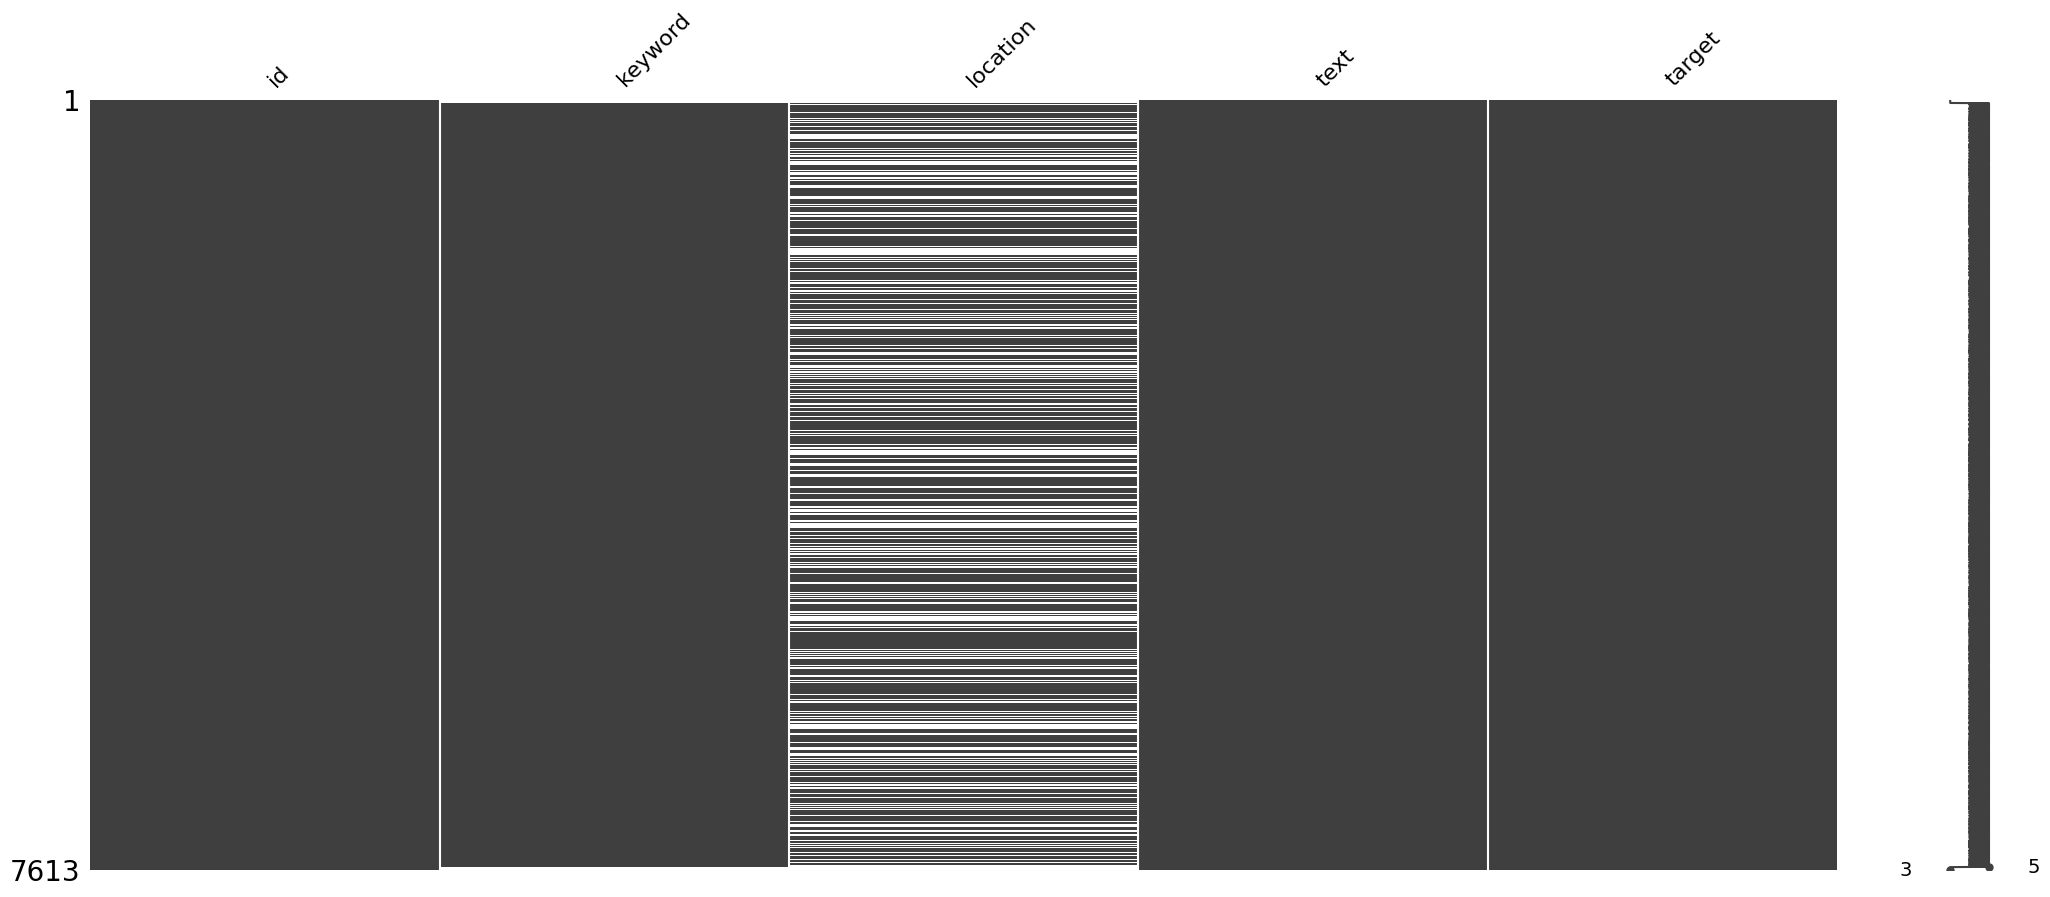

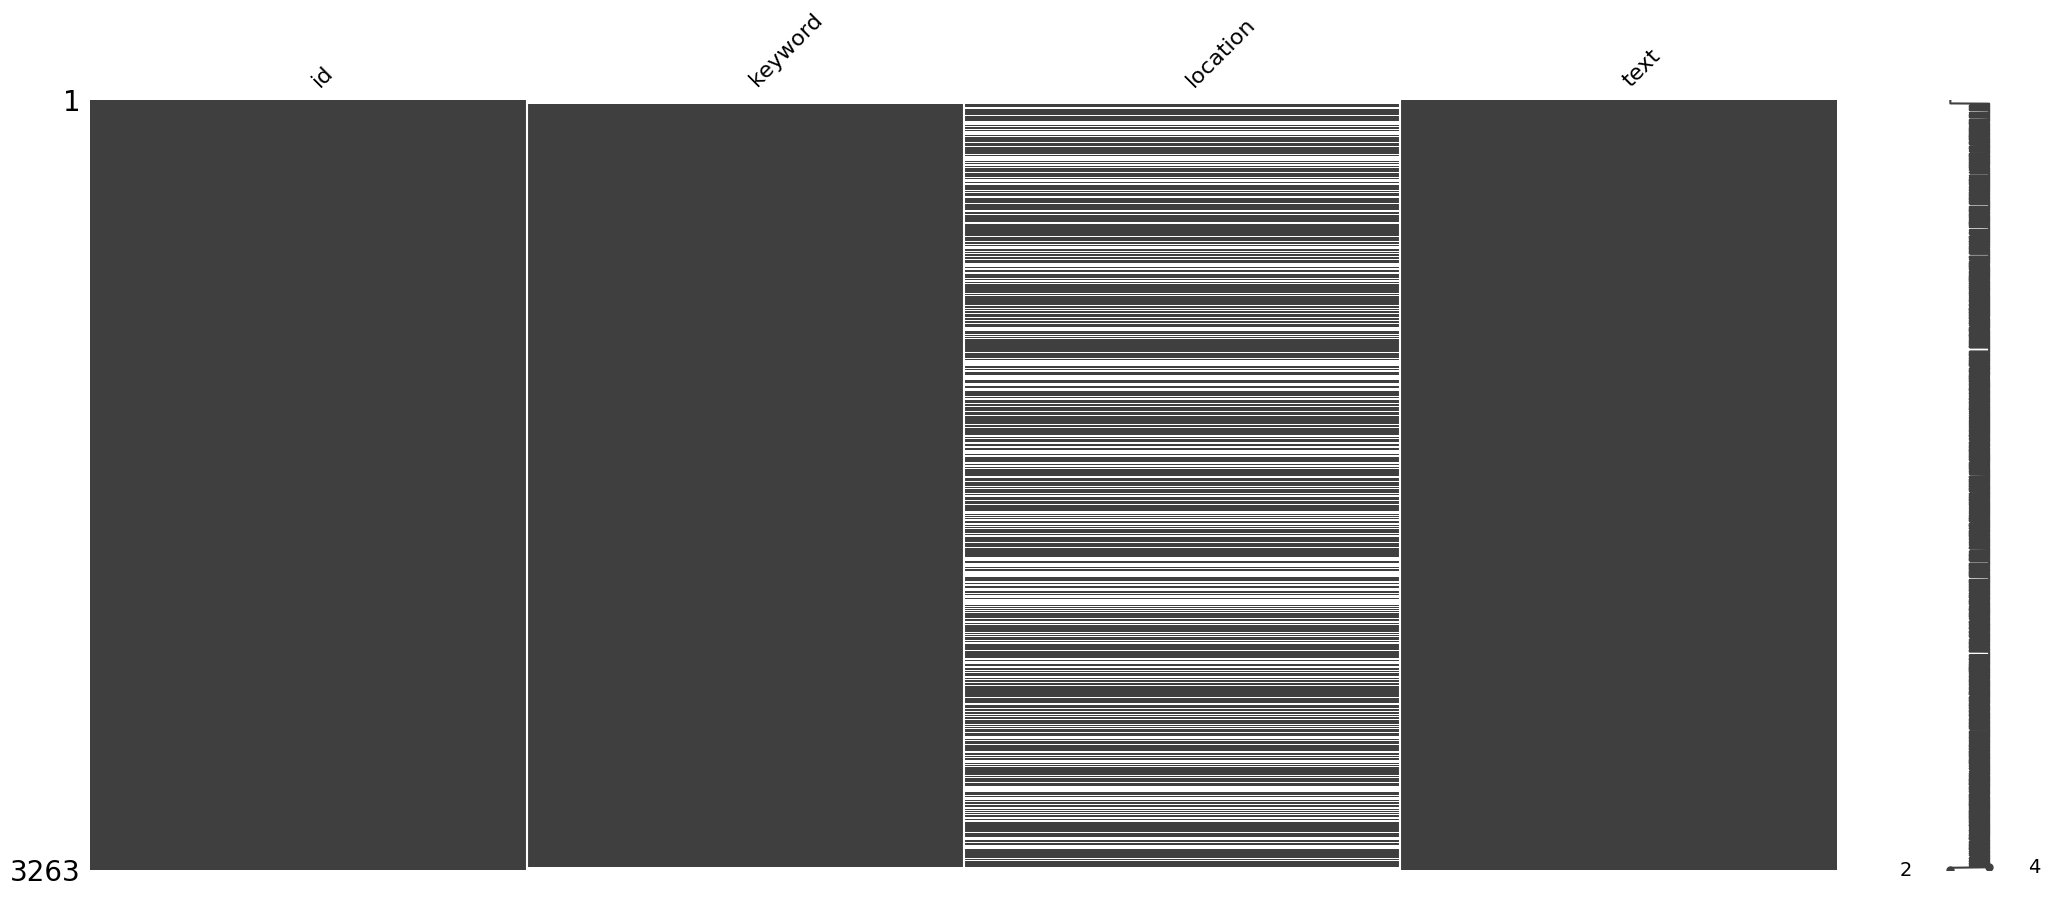

In [8]:
msno.matrix(df_train)
msno.matrix(df_test)

* Kategorik Değişken Analizi:



* Eksik Veri Analizi:



* Hedef Değişken İnceleme:



LOAD A DISTILBERT MODEL, FROM KERAS NLP

TRAIN MODEL, FINE-TUNING BERT

GENERATE THE SUBMISSION FILE